<a href="https://colab.research.google.com/github/AHartNtkn/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/LS_DS7_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-08-20 18:34:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-08-20 18:34:44 (600 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, chi2_contingency
from scipy import stats

In [130]:
df = pd.read_csv('house-votes-84.data',names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

#clean up the values
for c in df.columns:
  if c != 'party':
    df[c] = df[c].apply(lambda x: 0 if x == 'n' else (1 if x == 'y' else np.NaN))

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# To represent an interval, I need data first. I'll use the 'immigration' bill as my data.
ih_dem = df[df['party'] == 'democrat'].dropna()['immigration']
ih_rep = df[df['party'] == 'republican'].dropna()['immigration']

In [133]:
def confidence_interval(set1, set2, confidence=.95):
  # To get the intervals, I must first get the standard error and t-score, then muliply them.
  # This t-score is simply the 95% t-score with df = n1 + n2 - 2, since we have two samples
  t_score = stats.t.ppf((1 + .95) / 2.0, len(set1) + len(set2) - 2)

  # Since this is a two-sample test, the ns (or 1/sqrt(n)'s) need to be pooled
  def pooled_n(s1, s2):
    return (len(s1)**(-1) + len(s2)**(-1))**(1/2)

  # The standard deviations need to be pooled as well
  def pooled_std(s1, s2):
    std1 = np.std(s1, ddof=1)
    std2 = np.std(s2, ddof=1)
    n1 = len(s1)
    n2 = len(s2)
    return ((((n1-1)*(std1**2))+((n2-1)*(std2**2)))/(n1+n2-2))**(1/2)

  # Really pooled 1/sqrt(n), but that's a mouth-full
  pooled_size = pooled_n(set1, set2)
  pooled_standard_deviation = pooled_std(set1, set2)
  standard_error = pooled_standard_deviation * pooled_size

  # Here's our numerical representation of our interval.
  interval = t_score * standard_error

  # Our interval mean will simply be the difference in means of our two samples;
  mean = set1.mean() - set2.mean()

  # Here's our full interval.
  return (mean, mean - interval, mean + interval)
print(confidence_interval(ih_dem, ih_rep))

(-0.041816009557945066, -0.1712332275084027, 0.08760120839251256)


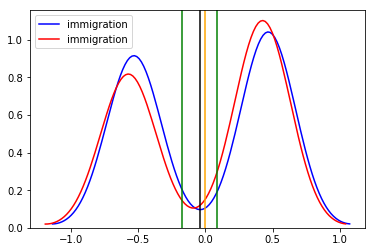

In [154]:
import seaborn as sns

CI = confidence_interval(ih_dem, ih_rep)
avg_mean = (ih_dem.mean() + ih_rep.mean())/2

sns.kdeplot(ih_dem-ih_dem.mean(), color='b')
sns.kdeplot(ih_rep-ih_rep.mean(), color='r')
plt.axvline(x=CI[1], color='g')
plt.axvline(x=CI[2], color='g')
plt.axvline(x=CI[0], color='black')
#plt.axvline(x=ih_dem.mean(), color='b')
#plt.axvline(x=ih_rep.mean(), color='r')
plt.axvline(x=0, color='orange')

As can be seen, zero falls within the p<.05 interval, meaning that we cannot reject the null hypothesis that the two distrobutions are essentially the same.



I'll be honest, I didn't find a good way to graph this. If it weren't a two-sample test, then I could have made something much more legible. For example:

In [228]:
def confidence_interval_1samp_size(idata, confidence=.95):
  data = np.array(idata)
 
  n = len(data)

  # To get the intervals, I must first get the standard error and t-score, then muliply them.
  # This t-score is simply the 95% t-score with df = n1 + n2 - 2, since we have two samples
  t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)

  standard_error = stats.sem(data)

  # Here's our numerical representation of our interval.
  return t_score * standard_error

def confidence_interval_1samp(data, confidence=.95):
  interval = confidence_interval_1samp_size(data, confidence)

  # Our interval mean will simply be the difference in means of our two samples;
  mean = data.mean()

  # Here's our full interval.
  return (mean, mean - interval, mean + interval)

print(confidence_interval_1samp(ih_dem))

(0.532258064516129, 0.44320399355877216, 0.6213121354734858)


In [0]:
print(confidence_interval_1samp(df[]))

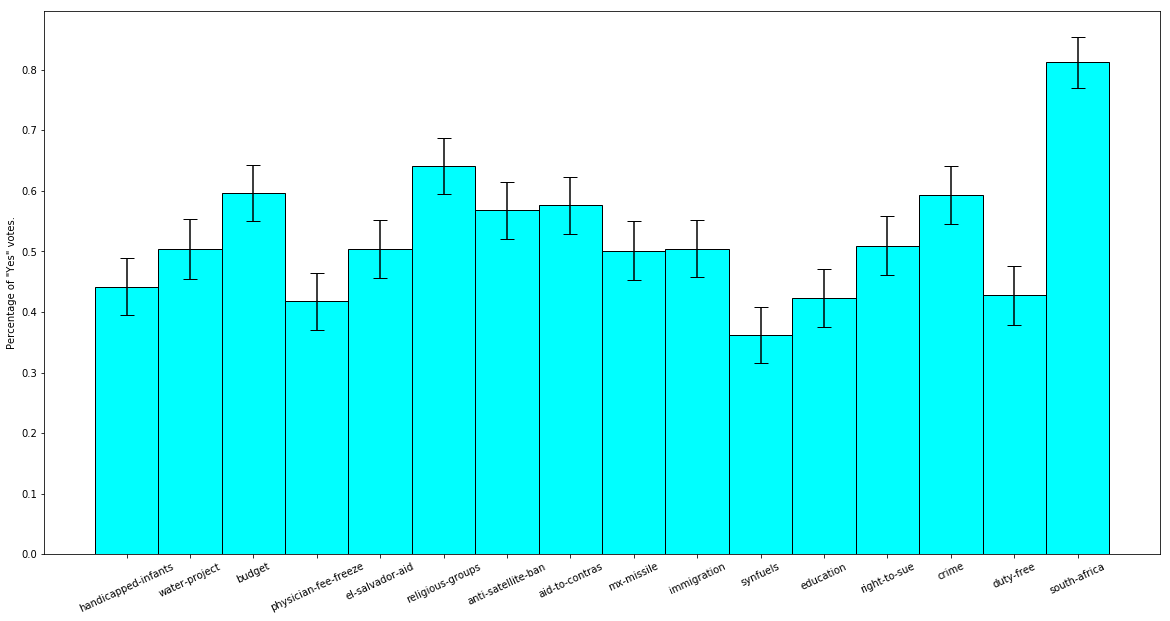

In [229]:
barWidth = 1

# df without the party column
dfnums = df.drop('party', axis=1)

# 1 bar for each column
bars1 = [ dfnums[c].mean() for c in dfnums.columns ]

# Bar intervals based on confidence interval
yer1 = [ confidence_interval_1samp_size(dfnums[c].dropna()) for c in dfnums.columns ]
 
# The x position of bars
r1 = np.arange(len(bars1))

# Make figure bigger
plt.figure(figsize=(20,10))

plt.bar(r1, bars1, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer1, capsize=7)
 
plt.xticks([r for r in range(len(bars1))], dfnums.columns, rotation=25)
plt.ylabel('Percentage of "Yes" votes.')
 
plt.show()

Chi-squared stuff

In [236]:
car_ad_data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_ad.csv', encoding='latin-1')
car_ad_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [239]:
# First, let's look at the default proportions for car types
# For the sake of simplicity, I'm going to select only the two most common types
car_ad_data = car_ad_data[(car_ad_data['car'] == 'Volkswagen') | (car_ad_data['car'] == 'Mercedes-Benz')]
car_ad_data['car'].value_counts()

Volkswagen       936
Mercedes-Benz    921
Name: car, dtype: int64

In [247]:
# Let's look at the association between the brand and body type
contingency_table = pd.crosstab(car_ad_data['car'], car_ad_data['body'], margins=True)
contingency_table

body,crossover,hatch,other,sedan,vagon,van,All
car,,,,,,,
Mercedes-Benz,168,23,141,385,22,182,921
Volkswagen,86,112,99,269,97,273,936
All,254,135,240,654,119,455,1857


In [0]:
benz = contingency_table.iloc[0][0:6].values
volks = contingency_table.iloc[1][0:6].values
colSums = contingency_table.iloc[2][0:6].values
rowSums = contingency_table.iloc[0:2, 6].values
total = contingency_table.iloc[2,6]

In [280]:
expected = np.array([ [c*r/total for c in colSums] for r in rowSums ])

print(expected)

Chi Squared: [[125.97415186  66.95476575 119.03069467 324.35864297  59.01938611
  225.66235864]
 [128.02584814  68.04523425 120.96930533 329.64135703  59.98061389
  229.33764136]]


In [0]:
observed = np.array(pd.crosstab(car_ad_data['car'], car_ad_data['body']))

In [281]:
print("Chi Squared:", ((observed - expected)**2/expected).sum())

Chi Squared: 178.43082498976878


In [286]:
print("Degrees of Freedom:", (lambda x: (x[0]-1)*(x[1]-1))(observed.shape))

Degrees of Freedom: 5


In [283]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print("Chi Squared:", chi_squared)

Chi Squared: 178.43082498976878


In [287]:
print("Degrees of Freedom:", dof)

Degrees of Freedom: 5


In [289]:
print("P Value:", p_value)

P Value: 1.157559967903585e-36


It appears that there is a relation between car brand and body.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)